# Extract variables to be plotted in other scripts

CM2-025 (cz861, present-day), CM2-1 (present-day), OM2-025 (IAF), OM2-1 (IAF)

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import intake
import xarray as xr
import numpy as np

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

Start a dask cluster

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38253,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:45343,Total threads: 1
Dashboard: /proxy/42337/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:36167,


CM2-025 can be accessed through an intake catalogue, created in `0_Make_NRI_intake_catalogue_ACCESS_CM2_025_cz861.ipynb`

In [3]:
cat = intake.open_esm_datastore(
    "/g/data/lg87/wgh581/datastore_ACCESS_CM2_025_cz861.json",
    columns_with_iterables=["variable"] # This is important
)

In [4]:
cat_CT = intake.open_esm_datastore(
    "/g/data/lg87/wgh581/experiment-datastore-CT.json",
    columns_with_iterables=["variable"] # This is important
)

The other data is in a Cosima Cookbook database (depreciated but still works)

In [4]:
# CM2 database
#session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/cj877/cj877.db') 
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
#expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [14]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

Define path where extracted variables will be saved

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [5]:
start_time = '0001-01-01'
end_time   = '0501-12-31'

---
## 1) Scalar diagnostics

In [8]:
def get_scalar_timeseries(expt, session, var, start_time=start_time, end_time=end_time, frequency='1 daily'):
    data = cc.querying.getvar(expt, var, session, start_time=start_time, end_time=end_time, frequency=frequency)
    data = data.sel(time=slice(start_time, end_time)).resample(time='Y').mean()
    data = data.load()
    
    return data

Atmospheric variables don't seem to work:

In [19]:
#cat.search(variable="fld_s03i234").keys()

In [20]:
test = cat.search(variable="fld_s03i234", frequency="1mon")#.to_dataset_dict() #.to_dask()#

In [23]:
test

,unique
path,6000
realm,1
variable,223
frequency,1
start_date,6000
end_date,6000
member,1
variable_long_name,1
variable_standard_name,1
variable_cell_methods,1


#### Total ocean heat content

CM2-025

In [7]:
%%time
temp_global_ave = cat.search(variable="temp_global_ave").to_dask().temp_global_ave
#salt_global_ave = cat.search(variable="salt_global_ave").to_dask().salt_global_ave

CPU times: user 9.36 s, sys: 1.29 s, total: 10.7 s
Wall time: 20 s


In [10]:
temp_global_ave.to_netcdf(path_to_data_cz861 + 'temp_global_ave_monthly.nc')

CM2-1

In [ ]:
temp_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='temp_global_ave', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
temp_CM2_1 = temp_CM2_1.resample(time='Y').mean().load()
temp_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/temp_global_ave_annual_CM2_1.nc')

OM2-025

In [ ]:
temp_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='temp_global_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
temp_OM2_025 = temp_OM2_025.resample(time='Y').mean().load()
temp_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/temp_global_ave_annual_OM2_025.nc')

OM2-1

In [ ]:
temp_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='temp_global_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
temp_OM2_1 = temp_OM2_1.resample(time='Y').mean().load()
temp_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/temp_global_ave_annual_OM2_1.nc')

#### Total ocean kinetic energy

CM2-025

In [12]:
%%time
ke_global_ave = cat.search(variable="ke_tot").to_dask().ke_tot

CPU times: user 6.21 s, sys: 394 ms, total: 6.6 s
Wall time: 6.91 s


In [13]:
ke_global_ave = ke_global_ave.load()

In [15]:
ke_global_ave.to_netcdf(path_to_data_cz861 + 'ke_tot_monthly.nc')

CM2-1

In [ ]:
ke_tot_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='ke_tot', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
ke_tot_CM2_1 = ke_tot_CM2_1.resample(time='Y').mean().load()
ke_tot_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/ke_tot_annual_CM2_1.nc')

OM2-025

In [ ]:
ke_tot_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='ke_tot', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
ke_tot_OM2_025 = ke_tot_OM2_025.resample(time='Y').mean().load()
ke_tot_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/ke_tot_annual_OM2_025.nc')

OM2-1

In [ ]:
ke_tot_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='ke_tot', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
ke_tot_OM2_1 = ke_tot_OM2_1.resample(time='Y').mean().load()
ke_tot_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/ke_tot_annual_OM2_1.nc')

#### Sea surface temperature

CM2-025

In [9]:
ds = cat.search(variable="temp_surface_ave",frequency="1mon").to_dask()

In [16]:
%%time
data = ds.temp_surface_ave.sel(time=slice('0001-01-01','0501-12-31')).resample(time='YE').mean()  # '0501-12-31'
data = data.where(data>10, np.nan)
data.load()

CPU times: user 33.4 s, sys: 1.88 s, total: 35.3 s
Wall time: 35.2 s


<xarray.DataArray 'temp_surface_ave' (time: 500, scalar_axis: 1)> Size: 4kB
array([[18.39379191],
       [18.35994234],
       [18.3705908 ],
       [18.35687737],
       [18.26919121],
       [18.16903726],
       [18.1567817 ],
       [18.24849789],
       [18.14316667],
       [17.95518993],
       [17.89763599],
       [17.89404652],
       [17.8089416 ],
       [17.75650938],
       [17.89715232],
       [18.03969562],
       [18.12761835],
       [18.15005433],
       [18.00513272],
       [17.96370625],
...
       [18.93561516],
       [18.89075497],
       [18.90099895],
       [18.95016439],
       [19.08782254],
       [18.98943564],
       [18.94552831],
       [19.01433539],
       [19.03991027],
       [19.00299105],
       [18.96263935],
       [18.91795609],
       [19.10161154],
       [19.08745764],
       [18.95167931],
       [18.95825194],
       [19.00274474],
       [19.01680677],
       [18.87773816],
       [18.90976311]])
Coordinates:
  * scalar_axis  (scalar_axis) float64 8B 0.0
  * time         (time) object 4kB 0001-12-31 00:00:00 ... 0500-12-31 00:00:00
Attributes:
    long_name:      Global mass weighted mean surface temp in liquid seawater
    units:          deg_C
    valid_range:    [ -10. 1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [18]:
data.to_netcdf(path_to_data_cz861 + 'temp_surface_ave_annual.nc')

CM2-1

In [25]:
%%time
SST_CM2_1 = get_scalar_timeseries(expt_CM2_1, session_CM2, 'temp_surface_ave', start_time='0001-01-01', end_time='1079-12-31', frequency='1 monthly')

CPU times: user 1min 12s, sys: 3.31 s, total: 1min 15s
Wall time: 1min 40s


In [27]:
SST_CM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/temp_surface_ave_annual_CM2_1.nc')

OM2-025

In [ ]:
%%time
SST_OM2_025 = get_scalar_timeseries(expt_OM2_025, session_OM2, 'temp_surface_ave', start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')

In [15]:
SST_OM2_025.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/temp_surface_ave_annual_OM2_025.nc')

OM2-1

In [ ]:
%%time
SST_OM2_1 = get_scalar_timeseries(expt_OM2_1, session_OM2, 'temp_surface_ave', start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')

In [13]:
SST_OM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/temp_surface_ave_annual_OM2_1.nc')

#### Sea surface salinity

CM2-025

In [19]:
ds = cat.search(variable="salt_surface_ave",frequency="1mon").to_dask()

In [20]:
%%time
data = ds.salt_surface_ave.sel(time=slice('0001-01-01','0501-12-31')).resample(time='YE').mean()
data = data.where(data>10, np.nan)
data.load()

CPU times: user 36.8 s, sys: 2.42 s, total: 39.3 s
Wall time: 38.7 s


<xarray.DataArray 'salt_surface_ave' (time: 500, scalar_axis: 1)> Size: 4kB
array([[34.64093616],
       [34.59283219],
       [34.56841263],
       [34.55656432],
       [34.5491118 ],
       [34.54830501],
       [34.5539942 ],
       [34.54951365],
       [34.54775134],
       [34.53227833],
       [34.5416454 ],
       [34.54167466],
       [34.55377623],
       [34.54461435],
       [34.56403394],
       [34.56017186],
       [34.56859871],
       [34.55275548],
       [34.53928381],
       [34.53405178],
...
       [34.21962479],
       [34.22281975],
       [34.23533718],
       [34.23384595],
       [34.23780918],
       [34.229441  ],
       [34.2260647 ],
       [34.23076075],
       [34.21802576],
       [34.22630696],
       [34.23040937],
       [34.2315017 ],
       [34.23754928],
       [34.24010315],
       [34.23528852],
       [34.23972059],
       [34.24759473],
       [34.23676329],
       [34.23138126],
       [34.22628766]])
Coordinates:
  * scalar_axis  (scalar_axis) float64 8B 0.0
  * time         (time) object 4kB 0001-12-31 00:00:00 ... 0500-12-31 00:00:00
Attributes:
    long_name:      Global mass weighted mean surface salt in liquid seawater
    units:          psu
    valid_range:    [ -10. 1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [21]:
data.to_netcdf(path_to_data_cz861 + 'salt_surface_ave_annual.nc')

CM2-1

In [ ]:
SSS_CM2_1 = cc.querying.getvar(expt=expt_CM2_1, variable='salt_surface_ave', session=session_CM2, frequency='1 monthly', start_time='0001-01-31', end_time='1079-12-31')
# SSS_CM2_1 = SSS_CM2_1.sel(time=slice(start_time_CM2, '0002-12-31')).resample(time='Y').mean()
SSS_CM2_1 = SSS_CM2_1.resample(time='Y').mean()
SSS_CM2_1 = SSS_CM2_1.load()
SSS_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/salt_surface_ave_annual_CM2_1.nc')

OM2-025

In [ ]:
SSS_OM2_025 = cc.querying.getvar(expt=expt_OM2_025, variable='salt_surface_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2549-12-31')
SSS_OM2_025 = SSS_OM2_025.resample(time='Y').mean().load()
SSS_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/salt_surface_ave_annual_OM2_025.nc')

OM2-1

In [ ]:
SSS_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='salt_surface_ave', session=session_OM2, frequency='1 monthly', start_time='1900-01-31', end_time='2679-12-31')
SSS_OM2_1 = SSS_OM2_1.resample(time='Y').mean().load()
SSS_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/salt_surface_ave_annual_OM2_1.nc')

---
## 2) Surface fields (2D)

#### Sea surface temperature

In [7]:
ds = cat.search(variable="temp", frequency="1mon").to_dask()

In [9]:
data = ds.temp.sel(time=slice('0400-01-01','0499-12-31')).sel(st_ocean=0, method='nearest').resample(time='YE').mean()
data = data.where(data>10, np.nan)

In [11]:
data = data.load()

In [15]:
(data-273.15).to_netcdf(path_to_data_cz861 + 'SST_global_annual_cz861.nc')

#### Sea surface salinity

In [16]:
ds = cat.search(variable="salt", frequency="1mon").to_dask()

In [26]:
data = ds.salt.sel(time=slice('0400-01-01','0499-12-31')).sel(st_ocean=0, method='nearest').resample(time='YE').mean()
data = data.where(data>0.1, np.nan)

In [27]:
%%time
data = data.load()

CPU times: user 2min 28s, sys: 8.89 s, total: 2min 37s
Wall time: 2min 42s


In [30]:
data.to_netcdf(path_to_data_cz861 + 'SSS_global_annual_cz861.nc')

OM2-1

In [50]:
# %%time
SSS_OM2_1 = cc.querying.getvar(expt=expt_OM2_1, variable='salt', session=session_OM2, frequency='1 monthly', start_time='2420-01-01', end_time='2519-12-31')
SSS_OM2_1 = SSS_OM2_1.sel(st_ocean=0, method='nearest').resample(time='Y').mean().load()
SSS_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/SSS_OM2_1_annual_2420_2519.nc')

#### Calculate model rms sea level anomaly

Compare models' sea level anomaly with AVISO SSH data.

Calculate model anomaly following https://github.com/COSIMA/ACCESS-OM2-1-025-010deg-report/blob/master/figures/ssh_variance/SeaLevelRMS.ipynb.

In [10]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [10]:
ds_sea_level = cat.search(variable="sea_level", frequency="1mon").to_dask()
ds_sea_level = ds_sea_level.sea_level.sel(time=slice('0400-01-01','0499-12-31')).mean('time')

In [8]:
#%%time
ds_sea_level_sq = cat.search(variable="sea_levelsq", frequency="1mon").to_dask()
ds_sea_level_sq = ds_sea_level_sq.sea_levelsq.sel(time=slice('0400-01-01','0499-12-31')).mean('time')

In [14]:
# RMS of sea level anomaly
sla_rm = (ds_sea_level_sq - ds_sea_level**(2.0))**(0.5)

In [15]:
%%time
sla_rm = sla_rm.load()

CPU times: user 29.3 s, sys: 5.82 s, total: 35.1 s
Wall time: 35.3 s


In [16]:
sla_rm.to_netcdf(path_to_data_cz861 + 'sla_rms_CM2_025_400_499_cz861.nc')

Other models

In [40]:
def get_rms_sla(expt, session, start_time='0400-01-01', end_time='0400-12-31'):
    sea_level = cc.querying.getvar(expt, 'sea_level', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level = sea_level.sel(time=slice(start_time, end_time)).mean('time')

    sea_level_sq = cc.querying.getvar(expt, 'sea_level_sq', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level_sq = sea_level_sq.sel(time=slice(start_time, end_time)).mean('time')
    
    # RMS of sea level anomaly
    sla_rm = (sea_level_sq - sea_level**(2.0))**(0.5)
    
    return sla_rm


def get_rms_sla_OM2(expt, session, start_time='0400-01-01', end_time='0400-12-31'):
    sea_level = cc.querying.getvar(expt, 'sea_level', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level = sea_level.sel(time=slice(start_time, end_time)).mean('time')

    sea_level_sq = cc.querying.getvar(expt, 'sea_levelsq', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level_sq = sea_level_sq.sel(time=slice(start_time, end_time)).mean('time')
    
    # RMS of sea level anomaly
    sla_rm = (sea_level_sq - sea_level**(2.0))**(0.5)
    
    return sla_rm

In [ ]:
%%time
sla_rm_CM2_025 = get_rms_sla(expt_CM2_025, session_CM2, start_time=start_time, end_time=end_time)

In [ ]:
sla_rm_CM2_1 = get_rms_sla(expt_CM2_1, session_CM2, start_time=start_time, end_time=end_time)

In [ ]:
sla_rm_OM2_025 = get_rms_sla_OM2(expt_OM2_025, session_OM2, start_time='2300-01-01', end_time='2399-12-31')

In [ ]:
# Different time (later in run as data is missing for the years I usually take)
sla_rm_OM2_1 = get_rms_sla_OM2(expt_OM2_1, session_OM2, start_time='2420-01-01', end_time='2519-12-31')

Load data

In [ ]:
sla_rm_CM2_025 = sla_rm_CM2_025.load()

In [38]:
sla_rm_CM2_1 = sla_rm_CM2_1.load()

In [ ]:
sla_rm_OM2_025 = sla_rm_OM2_025.load()

In [47]:
sla_rm_OM2_1 = sla_rm_OM2_1.load()

Save output

In [37]:
sla_rm_CM2_025.to_netcdf(path_to_data + 'sla_rms_CM2_025_400_499.nc')

In [39]:
sla_rm_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/sla_rms_CM2_1_400_499.nc')

In [44]:
sla_rm_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/sla_rms_OM2_025_2300_2399.nc')

In [48]:
sla_rm_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/sla_rms_OM2_1_2420_2519.nc')

#### Mixed layer depth

Monthly climatology

CM2-025

In [7]:
ds = cat.search(variable="mld",frequency="1mon").to_dask()

In [8]:
data = ds.mld.sel(time=slice('0400-01-01','0499-12-31'))
mld_CM2_025_clim = data.groupby('time.month').mean('time')
#data = data.where(data>10, np.nan)
#data.load()

In [9]:
%%time
mld_CM2_025_clim = mld_CM2_025_clim.load()

CPU times: user 28.4 s, sys: 2.72 s, total: 31.1 s
Wall time: 33.1 s


In [11]:
# Save data
mld_CM2_025_clim.to_netcdf(path_to_data_cz861 + 'mld_clim_CM2_025_400_499_cz861.nc')

Other models, define function to load data

In [12]:
def get_mld_clim(expt, session, start_time, end_time, frequency='1 monthly'):
    
    mld = cc.querying.getvar(expt, 'mld', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    mld = mld.sel(time=slice(start_time, end_time))
    mld_clim = mld.groupby('time.month').mean('time')
    
    return mld_clim.compute()

In [18]:
#%%time
#mld_CM2_025_clim = get_mld_clim(expt_CM2_025, session_CM2, start_time='0400-01-01', end_time='0499-12-31')

CPU times: user 13.6 s, sys: 638 ms, total: 14.3 s
Wall time: 15.6 s


CM2-1

In [13]:
%%time
mld_CM2_1_clim = get_mld_clim(expt_CM2_1, session_CM2, start_time='0400-01-01', end_time='0499-12-31')

CPU times: user 50.8 s, sys: 8.28 s, total: 59.1 s
Wall time: 2min 5s


In [14]:
# Save data
mld_CM2_1_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/mld_clim_CM2_1_400_499.nc')

OM2-025

In [15]:
%%time
mld_OM2_025_clim = get_mld_clim(expt_OM2_025, session_OM2, start_time='2300-01-01', end_time='2399-12-31')

CPU times: user 31 s, sys: 3.1 s, total: 34.1 s
Wall time: 38.9 s


In [16]:
# Save data
mld_OM2_025_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/mld_clim_OM2_025_2300_2399.nc')

OM2-1

In [17]:
%%time
mld_OM2_1_clim = get_mld_clim(expt_OM2_1, session_OM2, start_time='2300-01-01', end_time='2399-12-31')

CPU times: user 8.32 s, sys: 858 ms, total: 9.18 s
Wall time: 11.3 s


In [18]:
# Save data
mld_OM2_1_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/mld_clim_OM2_1_2300_2399.nc')

### Sea ice

In [15]:
# Grid information
area_t025 = cc.querying.getvar(expt_OM2_025, 'area_t', session_OM2, n=1)
area_t1   = cc.querying.getvar(expt_OM2_1, 'area_t', session_OM2, n=1)

**CM2-025**

In [ ]:
# NOT WORKING YET (LOADING TAKES SUPER LONG) - DATABASE ONLY WORKING PROPERLY FOR OCEAN MODEL OUTPUT AT THE MOMENT
#ds = cat.search(variable="aice",frequency="1mon").to_dask()

In [7]:
ds = cat_CT.search(variable="aice", frequency="1mon").to_dask()

In [6]:
test = cat_CT.search(variable="temp", frequency="1mon").to_dask()

In [6]:
# cat_CT.search(variable="aice", frequency="1mon")
cat_CT.search(variable="aice").keys()

['iceh_d_XXXX_XX.1day', 'iceh_m_XXXX_XX.1mon']

In [5]:
cat_CT.search(variable="aice")

,unique
filename,12000
file_id,2
path,12000
filename_timestamp,6000
frequency,2
start_date,6000
end_date,6000
variable,129
variable_long_name,2
variable_standard_name,2


In [6]:
aice = cat_CT.search(variable="aice", frequency="1mon",start_date="^04.*").to_dask(xarray_open_kwargs={"use_cftime":True})

In [8]:
aice = aice.aice

In [11]:
from datetime import timedelta
# Adjust time (to ensure it is in the correct month)
aice['time'] = aice.time.to_pandas() - timedelta(hours = 12)

In [16]:
# Coordinate names
aice.coords['ni'] = area_t025['xt_ocean'].values
aice.coords['nj'] = area_t025['yt_ocean'].values
aice = aice.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

In [18]:
# SH and NH sea ice
aice_NH = aice.sel(yt_ocean=slice(40, 90))
aice_SH = aice.sel(yt_ocean=slice(-90, -40))  

In [19]:
# Climatology
aice_SH_clim = aice_SH.groupby('time.month').mean('time', skipna=True)
aice_NH_clim = aice_NH.groupby('time.month').mean('time', skipna=True)

In [21]:
# Load data
aice_SH_clim = aice_SH_clim.load()
aice_NH_clim = aice_NH_clim.load()

In [22]:
# Save data
aice_SH_clim.to_netcdf(path_to_data_cz861 + 'aice_CM2_025_SH_clim_400_499_cz861.nc')
aice_NH_clim.to_netcdf(path_to_data_cz861 + 'aice_CM2_025_NH_clim_400_499_cz861.nc')

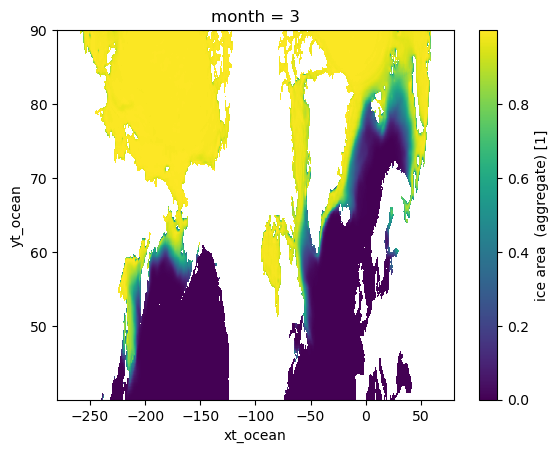

In [26]:
aice_NH_clim[2,:,:].plot()

**OM2-025**

In [23]:
%%time
aice_OM2_025 = cc.querying.getvar(expt_OM2_025, 'aice_m', session_OM2, frequency='1 monthly', start_time='2300-01-01', end_time='2400-01-31')

CPU times: user 4min 56s, sys: 30.9 s, total: 5min 27s
Wall time: 15min 13s


In [24]:
aice_OM2_025 = aice_OM2_025.sel(time=slice('2300-01-01', '2400-01-31'))
aice_OM2_025['time'] = aice_OM2_025.time.to_pandas() - timedelta(hours = 12) # shift time to make sure it is in the correct month
aice_OM2_025 = aice_OM2_025.sel(time=slice('2300-01-01', '2399-12-31'))

In [26]:
aice_OM2_025.coords['ni'] = area_t025['xt_ocean'].values
aice_OM2_025.coords['nj'] = area_t025['yt_ocean'].values
aice_OM2_025 = aice_OM2_025.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

Extract SH and NH

In [28]:
aice_OM2_025_NH = aice_OM2_025.sel(yt_ocean=slice(40, 90))
aice_OM2_025_SH = aice_OM2_025.sel(yt_ocean=slice(-90, -40))  

Climatology

In [29]:
aice_OM2_025_SH_clim = aice_OM2_025_SH.groupby('time.month').mean('time', skipna=True)
aice_OM2_025_NH_clim = aice_OM2_025_NH.groupby('time.month').mean('time', skipna=True)

Load data

In [30]:
aice_OM2_025_SH_clim = aice_OM2_025_SH_clim.load()
aice_OM2_025_NH_clim = aice_OM2_025_NH_clim.load()

Save data

In [31]:
aice_OM2_025_NH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/aice_OM2_025_NH_clim_2300_2399.nc')
aice_OM2_025_SH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/aice_OM2_025_SH_clim_2300_2399.nc')

**OM2-1**

In [32]:
%%time
aice_OM2_1 = cc.querying.getvar(expt_OM2_1, 'aice_m', session_OM2, frequency='1 monthly', start_time='2300-01-01', end_time='2400-01-31')

CPU times: user 2min 47s, sys: 15.3 s, total: 3min 2s
Wall time: 7min 36s


In [33]:
aice_OM2_1 = aice_OM2_1.sel(time=slice('2300-01-01', '2400-01-31'))
aice_OM2_1['time'] = aice_OM2_1.time.to_pandas() - timedelta(hours = 12) # shift time to make sure it is in the correct month
aice_OM2_1 = aice_OM2_1.sel(time=slice('2300-01-01', '2399-12-31'))

In [34]:
aice_OM2_1.coords['ni'] = area_t1['xt_ocean'].values
aice_OM2_1.coords['nj'] = area_t1['yt_ocean'].values
aice_OM2_1 = aice_OM2_1.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

Extract SH and NH

In [35]:
aice_OM2_1_NH = aice_OM2_1.sel(yt_ocean=slice(40, 90))
aice_OM2_1_SH = aice_OM2_1.sel(yt_ocean=slice(-90, -40))  

Climatology

In [36]:
aice_OM2_1_SH_clim = aice_OM2_1_SH.groupby('time.month').mean('time', skipna=True)
aice_OM2_1_NH_clim = aice_OM2_1_NH.groupby('time.month').mean('time', skipna=True)

Load data

In [37]:
aice_OM2_1_SH_clim = aice_OM2_1_SH_clim.load()
aice_OM2_1_NH_clim = aice_OM2_1_NH_clim.load()

Save data

In [38]:
aice_OM2_1_NH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/aice_OM2_1_NH_clim_2300_2399.nc')
aice_OM2_1_SH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/aice_OM2_1_SH_clim_2300_2399.nc')

**CM2-1**

At the moment, only the ocean data from u-bz687 is in the database.

Direct access to data:
`/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/ice`

In [19]:
import glob
path_sort = np.sort(glob.glob('/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/ice/iceh_d.04*.nc'))

In [94]:
# Load in first month
aice_tmp = xr.open_dataset('/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/ice/iceh_d.0400-01.nc').aice
# Monthly average, offline
aice_bz687 = aice_tmp.mean('time')
# Add time information (first entry in month)
aice_bz687.expand_dims(dim={"time": np.arange(1)}, axis=0)
aice_bz687['time'] = aice_tmp.time[0]

# Now repeat for remaining months and concatenate along time dimension
for i in range(1, len(path_sort)):
    aice_tmp = xr.open_dataset(path_sort[i]).aice
    aice_tmp_mean = aice_tmp.mean('time')
    aice_tmp_mean.expand_dims(dim={"time": np.arange(1)}, axis=0)
    aice_tmp_mean['time'] = aice_tmp.time[0]
    
    aice_bz687 = xr.concat([aice_bz687, aice_tmp_mean], dim='time')

Update coordinates to match ocean grid

In [95]:
aice_bz687.coords['ni'] = area_t1['xt_ocean'].values
aice_bz687.coords['nj'] = area_t1['yt_ocean'].values
aice_bz687 = aice_bz687.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

Extract SH and NH

In [96]:
aice_CM2_1_NH = aice_bz687.sel(yt_ocean=slice(40, 90))
aice_CM2_1_SH = aice_bz687.sel(yt_ocean=slice(-90, -40))  

Climatology

In [99]:
aice_CM2_1_SH_clim = aice_CM2_1_SH.groupby('time.month').mean('time', skipna=True)
aice_CM2_1_NH_clim = aice_CM2_1_NH.groupby('time.month').mean('time', skipna=True)

Load data

In [103]:
aice_CM2_1_SH_clim = aice_CM2_1_SH_clim.load()
aice_CM2_1_NH_clim = aice_CM2_1_NH_clim.load()

Save data

In [104]:
aice_CM2_1_NH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/aice_CM2_1_NH_clim_400_499.nc')
aice_CM2_1_SH_clim.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/aice_CM2_1_SH_clim_400_499.nc')

---
# 3D variables

#### Temperature

CM2-025

In [7]:
ds = cat.search(variable="temp",frequency="1mon").to_dask()

In [12]:
# %%time
# data = ds.temp.sel(time=slice('0400-01-01','0499-12-31'))
# temp_CM2_025 = data.mean('time')
# temp_CM2_025 = temp_CM2_025.where(temp_CM2_025>10, np.nan) - 273.15

CPU times: user 2.2 s, sys: 123 ms, total: 2.32 s
Wall time: 2.31 s


In [37]:
%%time
data = ds.temp.sel(time=slice('0490-01-01','0499-12-31'))
temp_CM2_025 = data.mean('time')
temp_CM2_025 = temp_CM2_025.where(temp_CM2_025>10, np.nan) - 273.15

CPU times: user 188 ms, sys: 13.4 ms, total: 202 ms
Wall time: 197 ms


In [38]:
%%time
temp_CM2_025 = temp_CM2_025.load()

CPU times: user 39.3 s, sys: 6.24 s, total: 45.5 s
Wall time: 49.8 s


In [39]:
temp_CM2_025.to_netcdf(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_100.nc')

In [73]:
# Load individually saved files and concatenate, save again
d1 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_10.nc')
d2 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_20.nc')
d3 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_30.nc')
d4 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_40.nc')
d5 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_50.nc')
d6 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_60.nc')
d7 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_70.nc')
d8 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_80.nc')
d9 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_90.nc')
d10 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861_100.nc')


In [74]:
temp_CM2_025 = xr.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10], dim='time', coords='all')

In [75]:
temp_CM2_025 = temp_CM2_025.mean('time').load()

In [76]:
temp_CM2_025.to_netcdf(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861.nc')

In [ ]:
# temp_CM2_025 = cc.querying.getvar(expt_CM2_025, 'temp', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly')# - 273.15
# temp_CM2_025 = temp_CM2_025.sel(time=slice(start_time,end_time))

In [38]:
# temp_CM2_025.mean('time').to_netcdf(path_to_data + 'temp_3d_CM2_025_400_499_mean.nc')

CM2-1

In [ ]:
temp_CM2_1 = cc.querying.getvar(expt_CM2_1, 'temp', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly') - 273.15
temp_CM2_1 = temp_CM2_1.sel(time=slice(start_time,end_time))

In [25]:
temp_CM2_1.mean('time').to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/temp_3d_CM2_1_400_499_mean.nc')

OM2-025

In [ ]:
temp_OM2_025 = cc.querying.getvar(expt_OM2_025, 'temp', session_OM2, start_time='2300-01-01', end_time='2399-12-31', frequency='1 monthly') - 273.15
temp_OM2_025 = temp_OM2_025.sel(time=slice('2300-01-01','2399-12-31'))

In [98]:
temp_OM2_025.mean('time').to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/temp_3d_OM2_025_2300_2399_mean.nc')

OM2-1

In [14]:
%%time
temp_OM2_1 = cc.querying.getvar(expt_OM2_1, 'temp', session_OM2, start_time='2420-01-01', end_time='2519-12-31', frequency='1 monthly') - 273.15
temp_OM2_1 = temp_OM2_1.sel(time=slice('2420-01-01','2519-12-31'))

CPU times: user 3.31 s, sys: 638 ms, total: 3.95 s
Wall time: 10.2 s


In [16]:
%%time
temp_OM2_1 = temp_OM2_1.mean('time').load()

CPU times: user 29.9 s, sys: 2.49 s, total: 32.4 s
Wall time: 39.4 s


In [17]:
temp_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/temp_3d_OM2_1_2420_2519_mean.nc')

#### Salinity

CM2-025

In [40]:
ds = cat.search(variable="salt",frequency="1mon").to_dask()

In [59]:
%%time
data = ds.salt.sel(time=slice('0480-01-01','0499-12-31'))
salt_CM2_025 = data.mean('time')
salt_CM2_025 = salt_CM2_025.where(salt_CM2_025>0.1, np.nan)

CPU times: user 309 ms, sys: 43.2 ms, total: 352 ms
Wall time: 377 ms


In [60]:
%%time
salt_CM2_025 = salt_CM2_025.load()

CPU times: user 1min 14s, sys: 29.5 s, total: 1min 44s
Wall time: 1min 55s


In [61]:
salt_CM2_025.to_netcdf(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_100.nc')

In [63]:
# Load individually saved files and concatenate, save again
d1 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_20.nc')
d2 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_40.nc')
d3 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_60.nc')
d4 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_80.nc')
d5 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861_100.nc')


In [69]:
salt_CM2_025 = xr.concat([d1, d2, d3, d4, d5], dim='time', coords='all')

In [70]:
salt_CM2_025 = salt_CM2_025.mean('time').load()

In [71]:
salt_CM2_025.to_netcdf(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861.nc')

In [ ]:
# salt_CM2_025 = cc.querying.getvar(expt_CM2_025, 'salt', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly')
# salt_CM2_025 = salt_CM2_025.sel(time=slice(start_time,end_time))

In [40]:
# salt_CM2_025.mean('time').to_netcdf(path_to_data + 'salt_3d_CM2_025_400_499_mean.nc')

CM2-1

In [ ]:
salt_CM2_1 = cc.querying.getvar(expt_CM2_1, 'salt', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly')
salt_CM2_1 = salt_CM2_1.sel(time=slice(start_time,end_time))

In [42]:
salt_CM2_1.mean('time').to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/salt_3d_CM2_1_400_499_mean.nc')

OM2-025

In [ ]:
salt_OM2_025 = cc.querying.getvar(expt_OM2_025, 'salt', session_OM2, start_time='2300-01-01', end_time='2399-12-31', frequency='1 monthly')
salt_OM2_025 = salt_OM2_025.sel(time=slice('2300-01-01','2399-12-31'))

In [9]:
salt_OM2_025.mean('time').to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/salt_3d_OM2_025_2300_2399_mean.nc')

OM2-1

In [18]:
%%time
salt_OM2_1 = cc.querying.getvar(expt_OM2_1, 'salt', session_OM2, start_time='2420-01-01', end_time='2519-12-31', frequency='1 monthly') 
salt_OM2_1 = salt_OM2_1.sel(time=slice('2420-01-01','2519-12-31'))

CPU times: user 2.2 s, sys: 417 ms, total: 2.62 s
Wall time: 6.99 s


In [21]:
%%time
salt_OM2_1 = salt_OM2_1.mean('time').load()

CPU times: user 27.5 s, sys: 2.32 s, total: 29.8 s
Wall time: 36 s


In [22]:
salt_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/salt_3d_OM2_1_2420_2519_mean.nc')

### Transport through straits

In [5]:
straits = { 'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
              'Lombok':     [-244.6, -243.9, -8.6, -8.6],
              'Ombai' :     [-235.0, -235.0, -9.2, -8.1],
              'Timor' :     [-235.9, -235.9, -11.9, -9.9],
              'Bering' :    [-172, -167, 65.8, 65.8],
              'Denmark' :   [-42, -22, 65.8, 65.8],
            }

CM2-025 (intake catalogue)

In [6]:
test = cat.search(variable="temp",frequency="1mon").to_dask()

In [7]:
tx_trans = cat.search(variable="tx_trans_int_z",frequency="1mon").to_dask()

In [8]:
ty_trans = cat.search(variable="ty_trans_int_z",frequency="1mon").to_dask()

In [11]:
tx = tx_trans.tx_trans_int_z.sel(time=slice('0400-01-01','0499-12-31'))

In [13]:
ty = ty_trans.ty_trans_int_z.sel(time=slice('0400-01-01','0499-12-31'))

In [22]:
rho = 1036 # kg/m^3, mean density of seawater

def calc_transport_cz861(strait):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    xmin, xmax, ymin, ymax = straits[strait]
    
    if ymax>=65:
        raise ValueError('North of 65N the tripolar grid geometry brings complications and `.sum(''xt_ocean'')` is wrong!')
    
    #print('Calculating {}: {} transport'.format(expt, strait))
    
    if xmin == xmax:       
        #tx_trans = cc.querying.getvar(expt, 'tx_trans_int_z', session)
        transport = tx.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # tx_trans = cc.querying.getvar(expt,'tx_trans',session)
        # transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
        #                     .sel(yt_ocean=slice(ymin, ymax))\
        #                     .sum('st_ocean').sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.

    elif ymin == ymax:
        #ty_trans = cc.querying.getvar(expt, 'ty_trans_int_z', session)
        transport = ty.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # ty_trans = cc.querying.getvar(expt,'ty_trans',session)
        # transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
        #                     .sel(xt_ocean=slice(xmin, xmax))\
        #                     .sum('st_ocean').sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.resample(time='Y').mean()
    transport = transport.compute()
       
    return transport

In [23]:
%%time
transport = calc_transport_cz861('DrakePassage')

CPU times: user 13.6 s, sys: 846 ms, total: 14.4 s
Wall time: 14.7 s


In [28]:
CM2_025_Lombok = calc_transport_cz861('Lombok')

In [30]:
CM2_025_Ombai = calc_transport_cz861('Ombai')

In [31]:
CM2_025_Timor = calc_transport_cz861('Timor')

In [32]:
print('CM2-025, cz861')
print('Drake Passage:', np.round(transport.mean('time').values,2))
print('Lombok:', np.round(CM2_025_Lombok.mean('time').values,2))
print('Ombai:', np.round(CM2_025_Ombai.mean('time').values,2))
print('Timor:', np.round(CM2_025_Timor.mean('time').values,2))

CM2-025, cz861
Drake Passage: 210.65
Lombok: -3.49
Ombai: -0.04
Timor: -5.1


Other models (cookbook)

In [19]:
rho = 1036 # kg/m^3, mean density of seawater

def calc_transport(expt, session, strait):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    xmin, xmax, ymin, ymax = straits[strait]
    
    if ymax>=65:
        raise ValueError('North of 65N the tripolar grid geometry brings complications and `.sum(''xt_ocean'')` is wrong!')
    
    print('Calculating {}: {} transport'.format(expt, strait))
    
    if xmin == xmax:       
        tx_trans = cc.querying.getvar(expt, 'tx_trans_int_z', session)
        transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # tx_trans = cc.querying.getvar(expt,'tx_trans',session)
        # transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
        #                     .sel(yt_ocean=slice(ymin, ymax))\
        #                     .sum('st_ocean').sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.

    elif ymin == ymax:
        ty_trans = cc.querying.getvar(expt, 'ty_trans_int_z', session)
        transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # ty_trans = cc.querying.getvar(expt,'ty_trans',session)
        # transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
        #                     .sel(xt_ocean=slice(xmin, xmax))\
        #                     .sum('st_ocean').sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.resample(time='Y').mean()
    transport = transport.compute()
       
    return transport

In [ ]:
%%time
DrakePassage = calc_transport(expt_CM2_025, session_CM2, 'DrakePassage')

In [ ]:
# Save loaded data
DrakePassage.to_netcdf(path_to_data + 'DrakePassage_transport_annual.nc')